In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [2]:
col = ["flength", "fwidth", "fsize", "fconc", "fconc1", "fasym", "fm3long", "fm3trans", "falpha", "fdist", "class"]
df = pd.read_csv("magic04.data", names=col)
df.head()

flength    fwidth   fsize   fconc  fconc1     fasym  fm3long  fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    falpha     fdist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class'] = (df['class'] == 'g').astype(int)


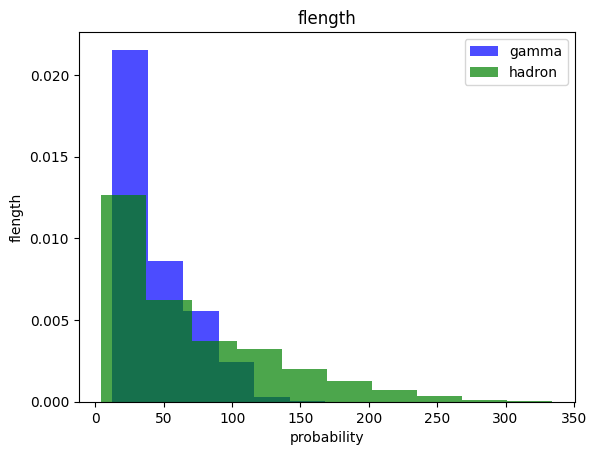

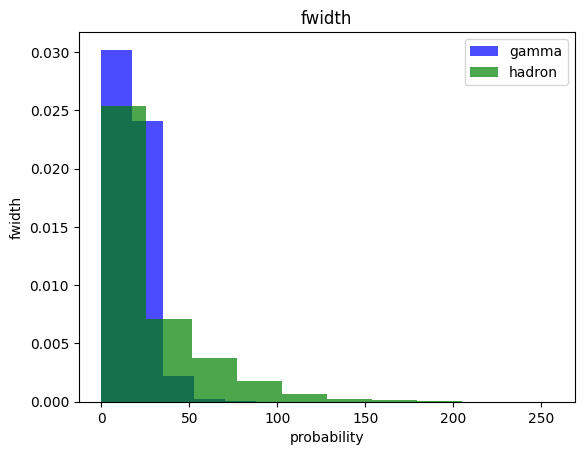

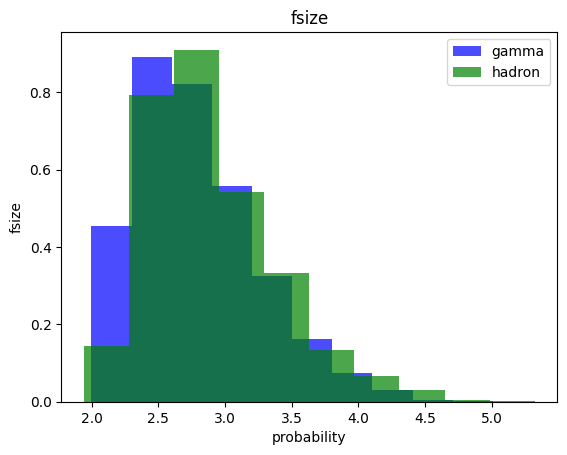

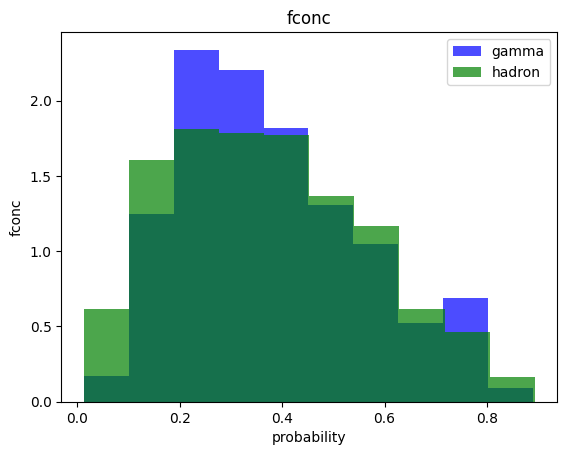

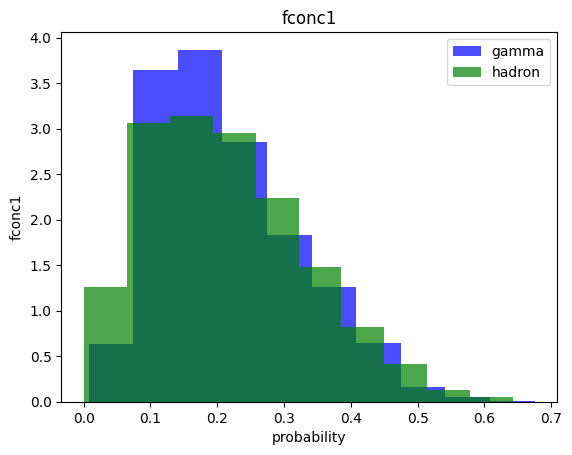

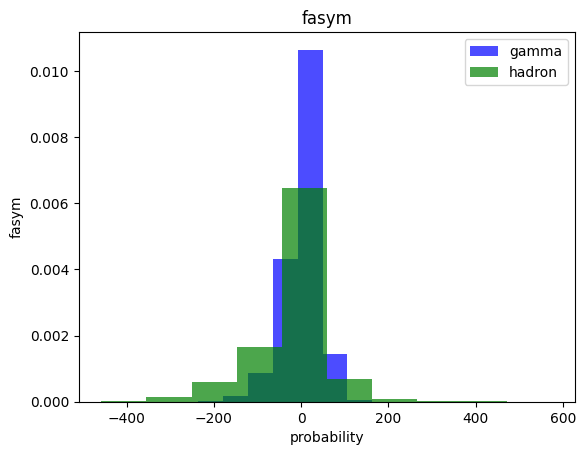

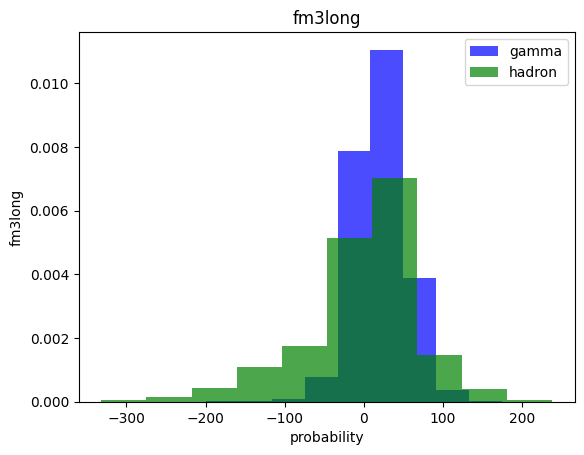

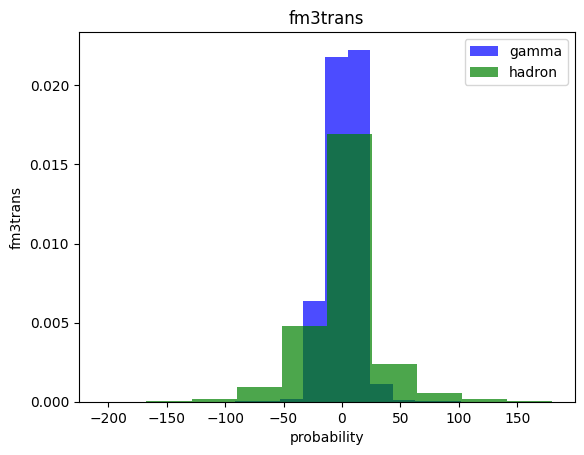

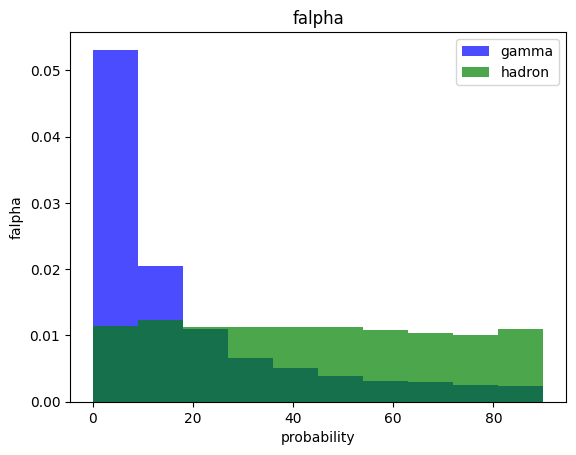

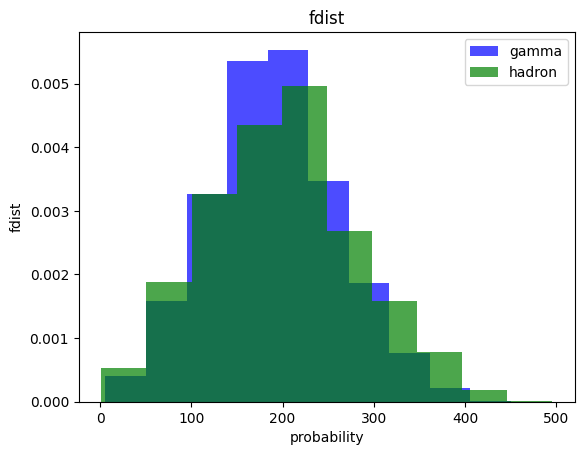

In [4]:
for label in col[:-1]:
    plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class']==0][label], color='green', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.xlabel('probability')
    plt.ylabel(label)
    plt.legend()
    plt.show()


Train, Validation and Test datasets

In [5]:
train, validation, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8 *len(df))])

/home/localdev/.local/share/virtualenvs/machine-learning-ztm-rPYay6DU/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_dataset(dataframe, oversampler=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scalar = StandardScaler()
    X = scalar.fit_transform(X)

    if oversampler:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y
    

In [7]:
train, X_train, y_train = scale_dataset(train, oversampler=True)
validation, x_validation, y_validation = scale_dataset(validation, oversampler=False)
test, X_test, y_test = scale_dataset(test, oversampler=False)

KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn_model.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1313
           1       0.86      0.85      0.85      2491

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



NAIVE BAYSE

In [11]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [13]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.41      0.51      1313
           1       0.74      0.89      0.81      2491

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



LOGISTIC REGRESSION

In [14]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [15]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1313
           1       0.85      0.81      0.83      2491

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



SVM

In [16]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)


In [17]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1313
           1       0.89      0.90      0.89      2491

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Networks

In [34]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel("binarycrossentropy")
    plt.grid(True)


    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel("accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [18]:
import tensorflow as tf


2023-09-07 11:19:33.332045: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 11:19:33.372969: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-07 11:19:33.373848: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-07 11:19:34.489042: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [26]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,) ),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)

    return nn_model, history


num_nodes:16 drop_prob:0 lr:0.01 batch_size:32 epoch:100


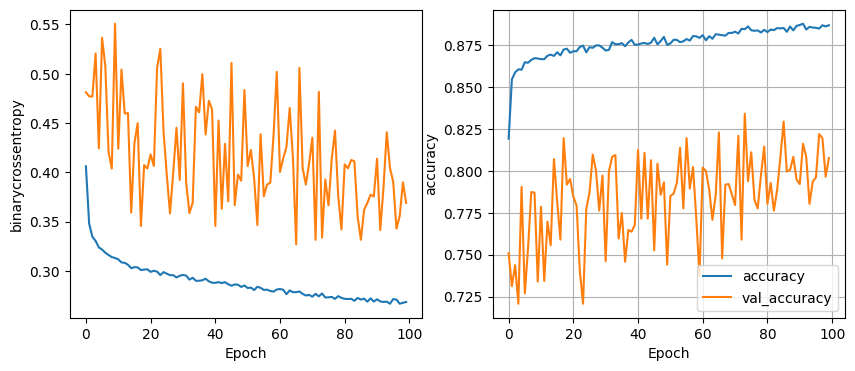

119/119 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.8644
0.8643532991409302
num_nodes:16 drop_prob:0 lr:0.01 batch_size:64 epoch:100


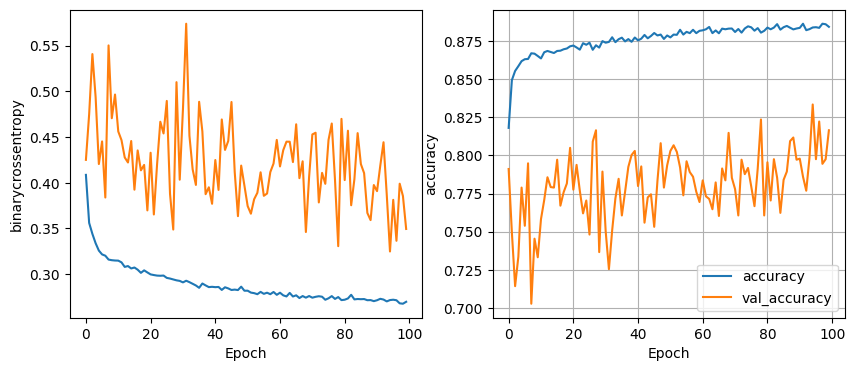

119/119 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8678
0.867770791053772
num_nodes:16 drop_prob:0 lr:0.01 batch_size:128 epoch:100


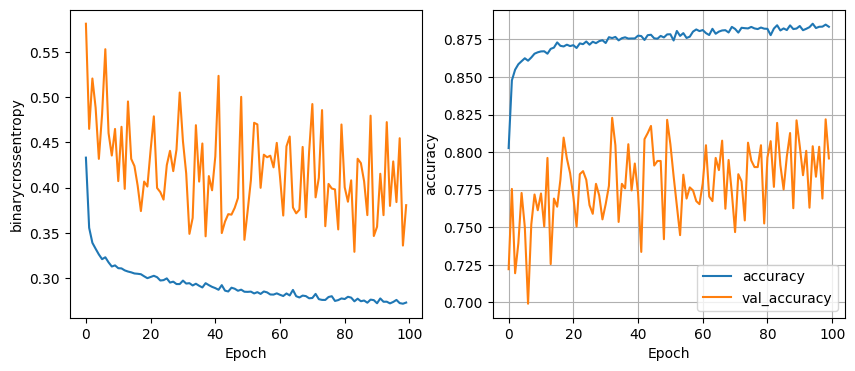

119/119 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8649
0.8648790717124939
num_nodes:16 drop_prob:0 lr:0.005 batch_size:32 epoch:100


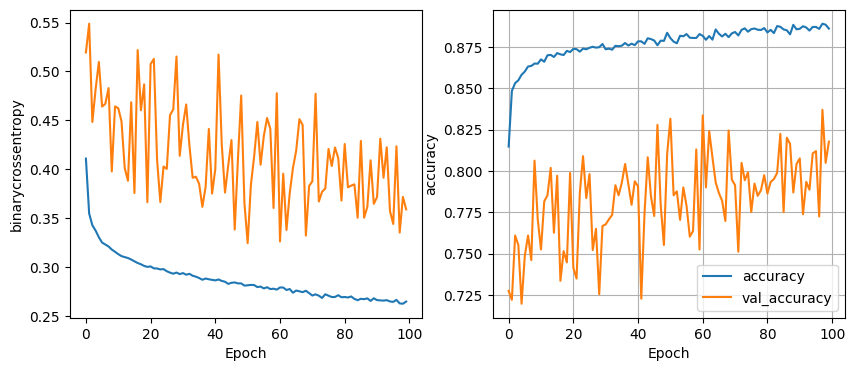

119/119 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8623
0.8622502684593201
num_nodes:16 drop_prob:0 lr:0.005 batch_size:64 epoch:100


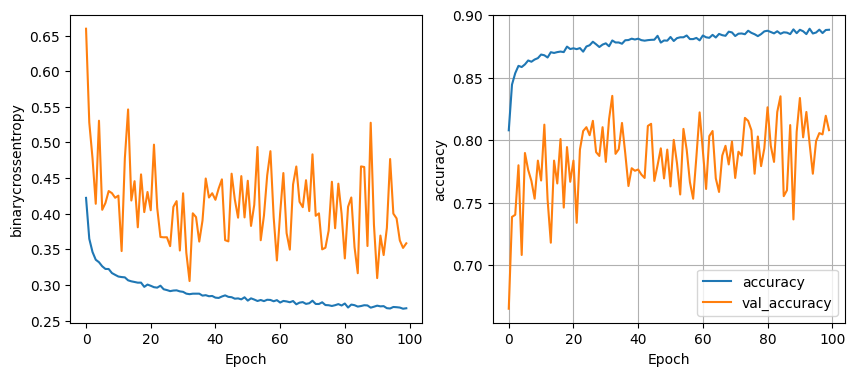

119/119 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8649
0.8648790717124939
num_nodes:16 drop_prob:0 lr:0.005 batch_size:128 epoch:100


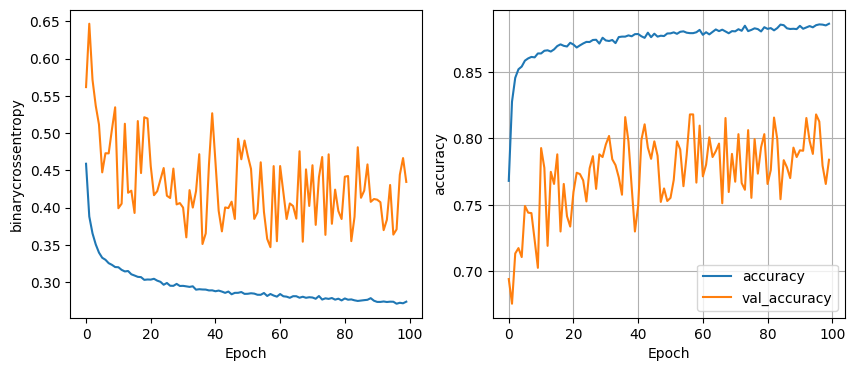

119/119 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.8696
0.8696109652519226
num_nodes:16 drop_prob:0 lr:0.001 batch_size:32 epoch:100


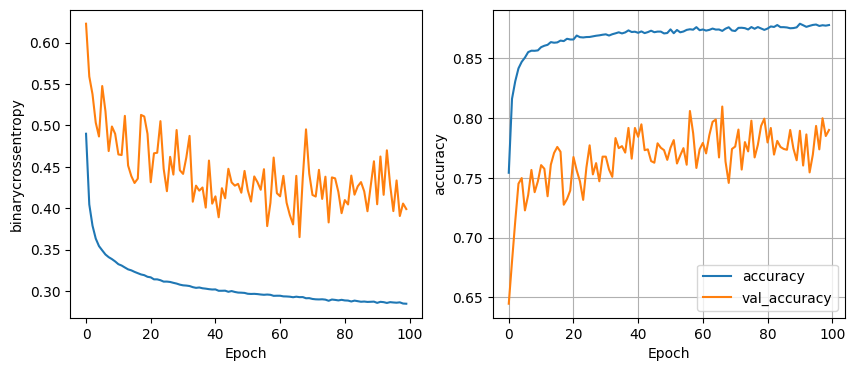

119/119 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8657
0.8656677007675171
num_nodes:16 drop_prob:0 lr:0.001 batch_size:64 epoch:100


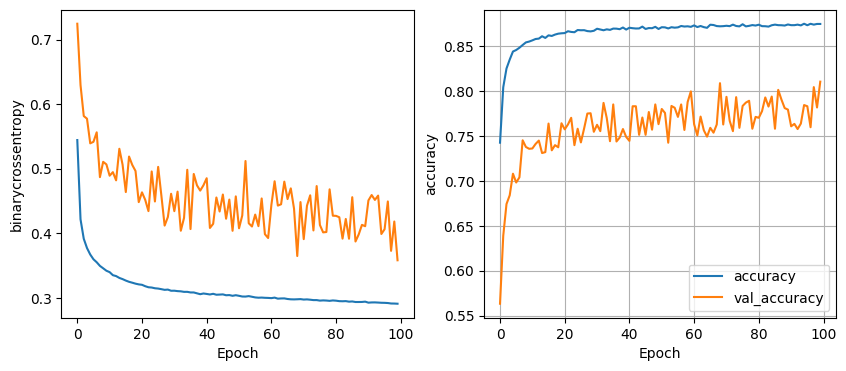

119/119 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.8638
0.8638275265693665
num_nodes:16 drop_prob:0 lr:0.001 batch_size:128 epoch:100


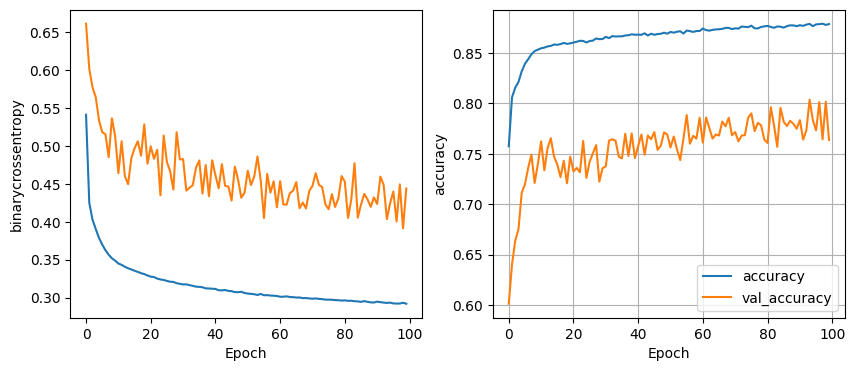

119/119 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8728
0.8727654814720154
num_nodes:16 drop_prob:0.2 lr:0.01 batch_size:32 epoch:100


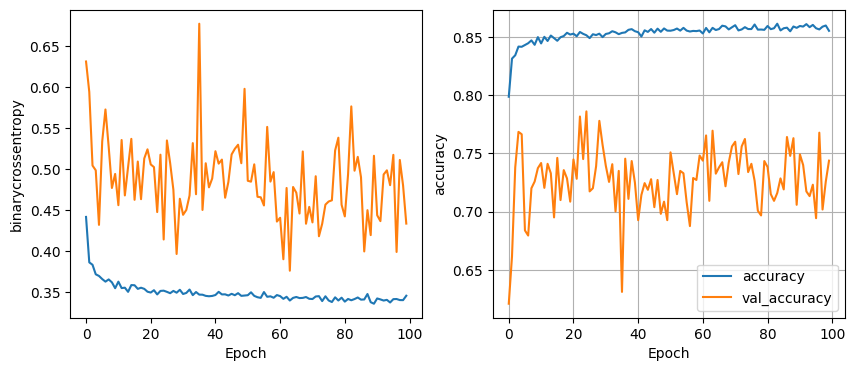

119/119 [==============================] - 0s 3ms/step - loss: 0.3266 - accuracy: 0.8680
0.8680336475372314
num_nodes:16 drop_prob:0.2 lr:0.01 batch_size:64 epoch:100


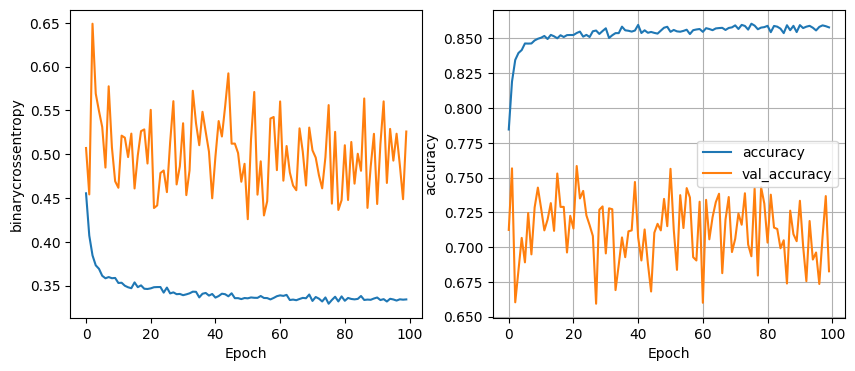

119/119 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.8601
0.86014723777771
num_nodes:16 drop_prob:0.2 lr:0.01 batch_size:128 epoch:100


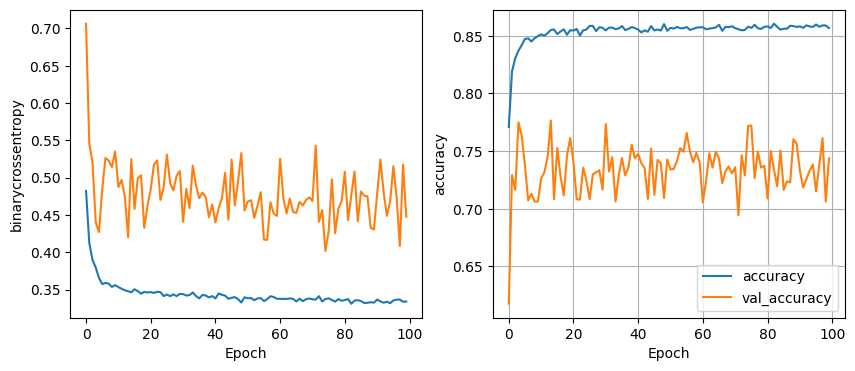

119/119 [==============================] - 1s 6ms/step - loss: 0.3222 - accuracy: 0.8712
0.871188223361969
num_nodes:16 drop_prob:0.2 lr:0.005 batch_size:32 epoch:100


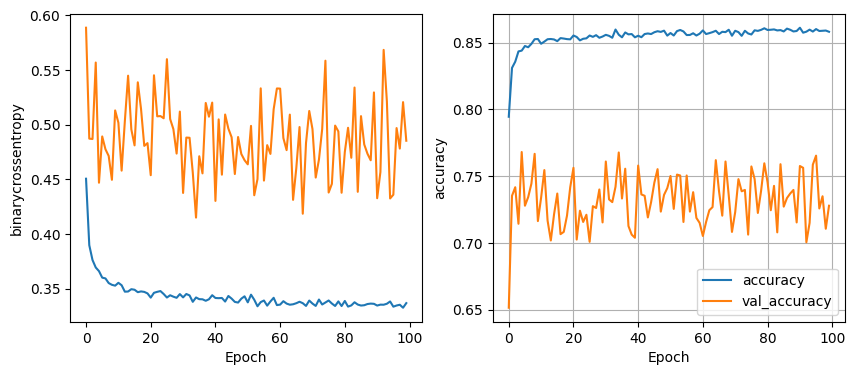

119/119 [==============================] - 1s 4ms/step - loss: 0.3260 - accuracy: 0.8580
0.8580441474914551
num_nodes:16 drop_prob:0.2 lr:0.005 batch_size:64 epoch:100


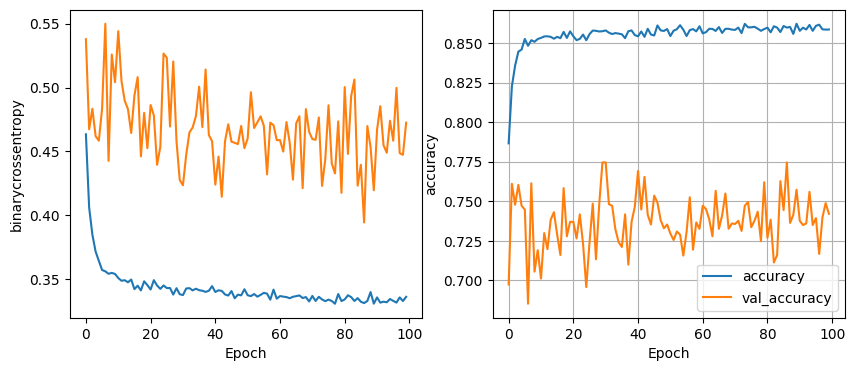

119/119 [==============================] - 1s 4ms/step - loss: 0.3243 - accuracy: 0.8659
0.8659306168556213
num_nodes:16 drop_prob:0.2 lr:0.005 batch_size:128 epoch:100


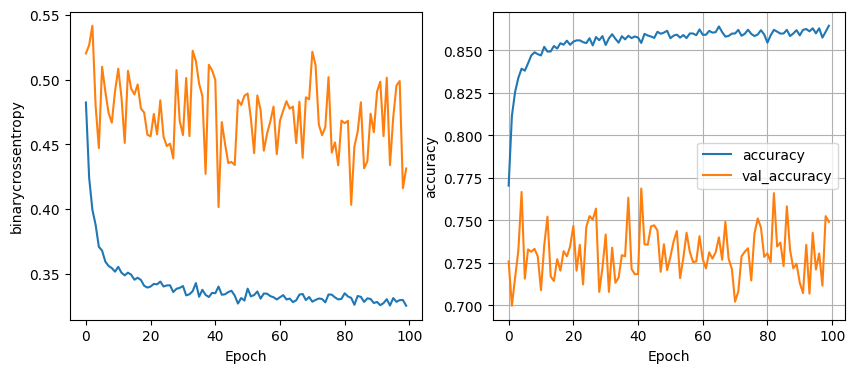

119/119 [==============================] - 1s 6ms/step - loss: 0.3165 - accuracy: 0.8749
0.8748685717582703
num_nodes:16 drop_prob:0.2 lr:0.001 batch_size:32 epoch:100


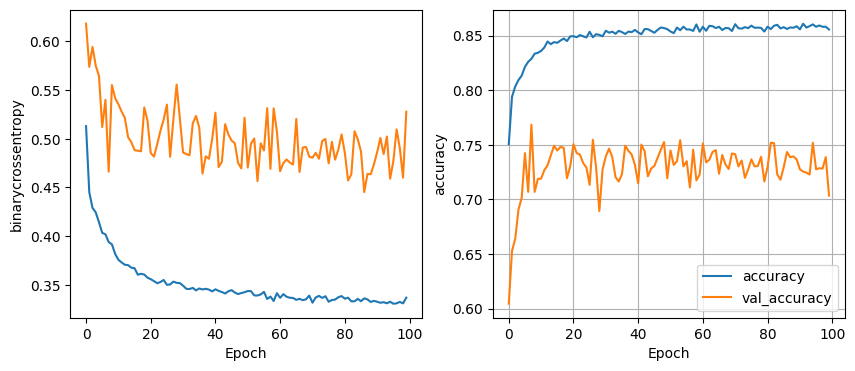

119/119 [==============================] - 1s 4ms/step - loss: 0.3275 - accuracy: 0.8615
0.8614616394042969
num_nodes:16 drop_prob:0.2 lr:0.001 batch_size:64 epoch:100


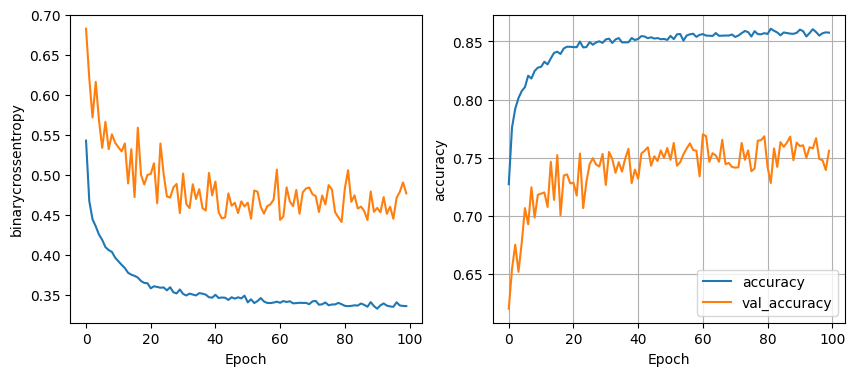

119/119 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.8628
0.8627760410308838
num_nodes:16 drop_prob:0.2 lr:0.001 batch_size:128 epoch:100


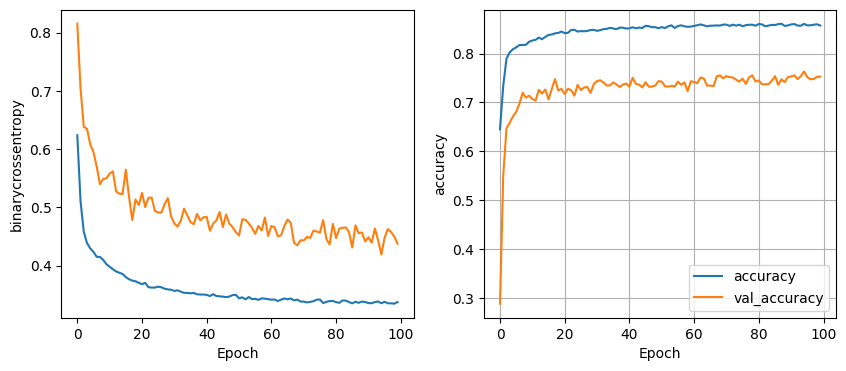

119/119 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.8680
0.8680336475372314
num_nodes:32 drop_prob:0 lr:0.01 batch_size:32 epoch:100


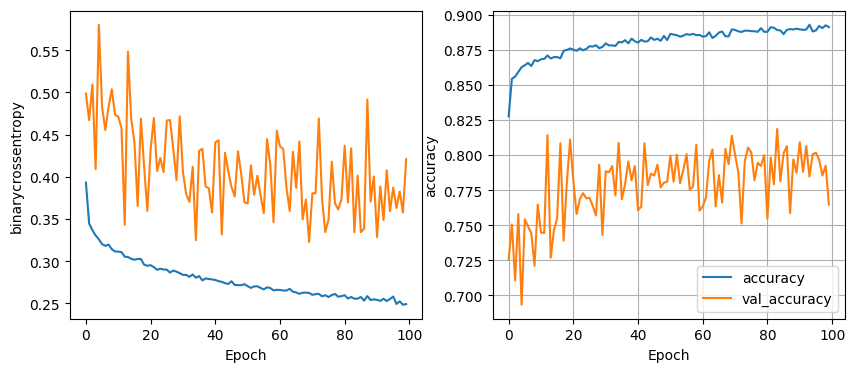

119/119 [==============================] - 0s 3ms/step - loss: 0.3810 - accuracy: 0.8620
0.8619873523712158
num_nodes:32 drop_prob:0 lr:0.01 batch_size:64 epoch:100


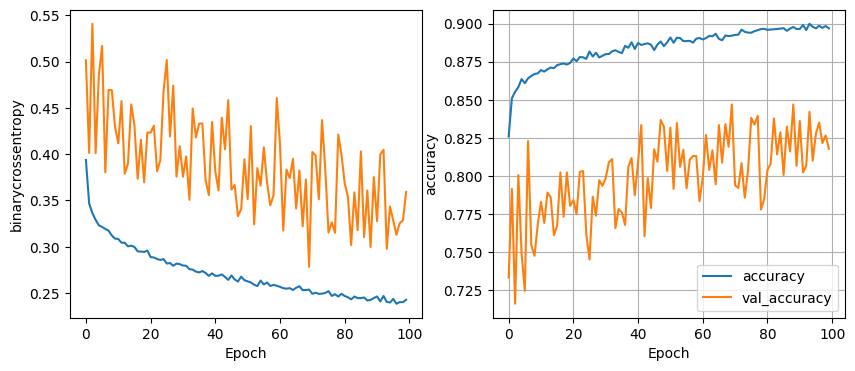

119/119 [==============================] - 0s 3ms/step - loss: 0.3783 - accuracy: 0.8659
0.8659306168556213
num_nodes:32 drop_prob:0 lr:0.01 batch_size:128 epoch:100


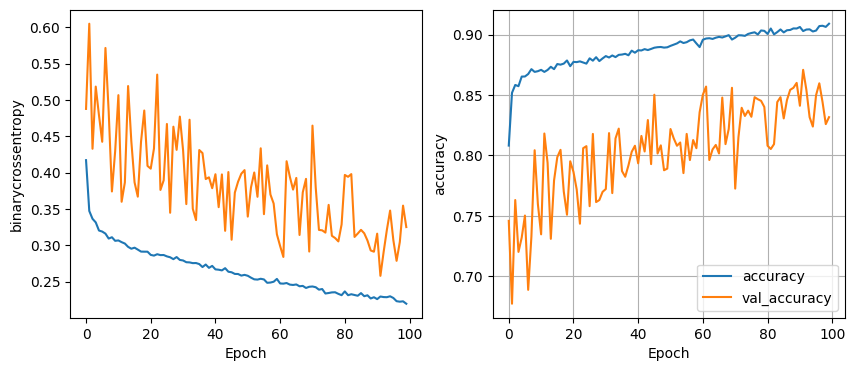

119/119 [==============================] - 0s 3ms/step - loss: 0.4037 - accuracy: 0.8573
0.8572555184364319
num_nodes:32 drop_prob:0 lr:0.005 batch_size:32 epoch:100


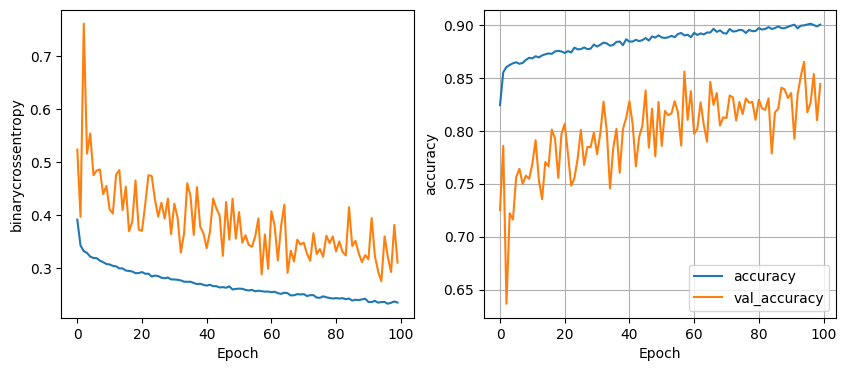

119/119 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8562
0.8562039732933044
num_nodes:32 drop_prob:0 lr:0.005 batch_size:64 epoch:100


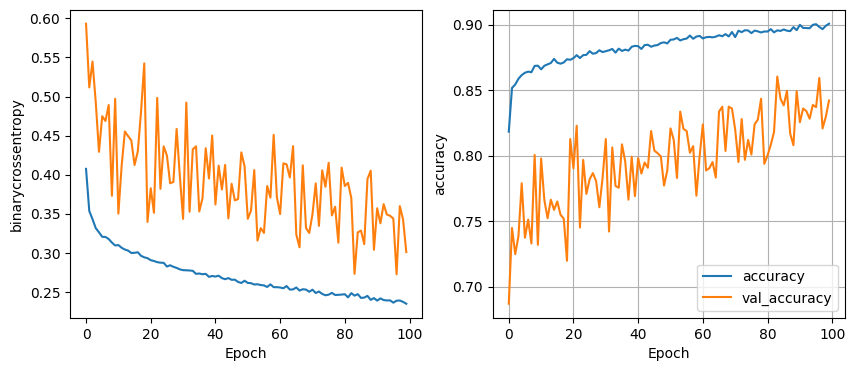

119/119 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8601
0.86014723777771
num_nodes:32 drop_prob:0 lr:0.005 batch_size:128 epoch:100


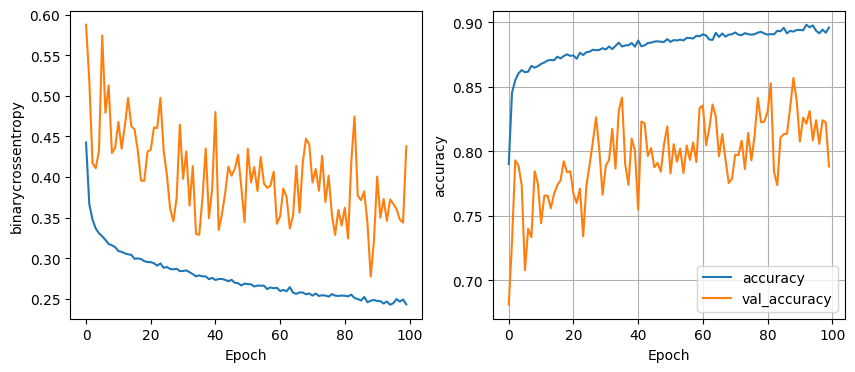

119/119 [==============================] - 0s 3ms/step - loss: 0.3714 - accuracy: 0.8609
0.8609358668327332
num_nodes:32 drop_prob:0 lr:0.001 batch_size:32 epoch:100


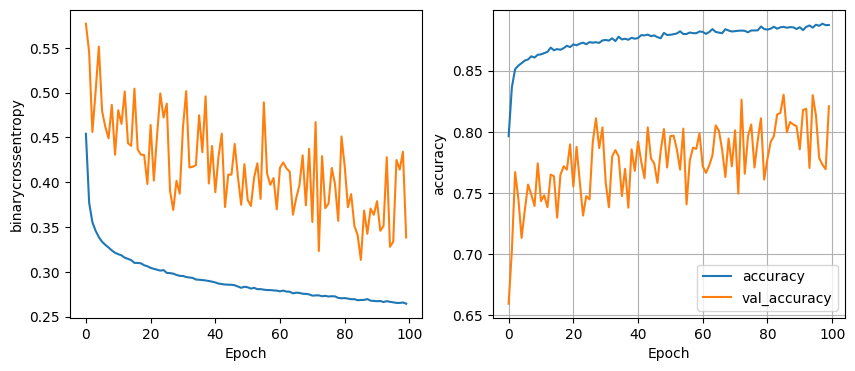

119/119 [==============================] - 0s 3ms/step - loss: 0.3242 - accuracy: 0.8680
0.8680336475372314
num_nodes:32 drop_prob:0 lr:0.001 batch_size:64 epoch:100


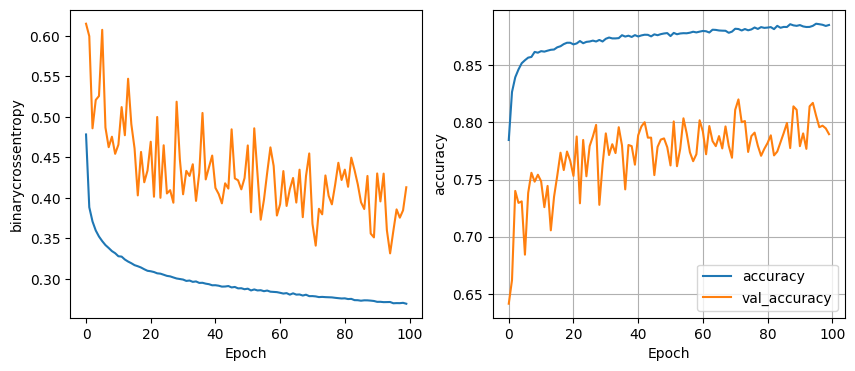

119/119 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8683
0.8682965040206909
num_nodes:32 drop_prob:0 lr:0.001 batch_size:128 epoch:100


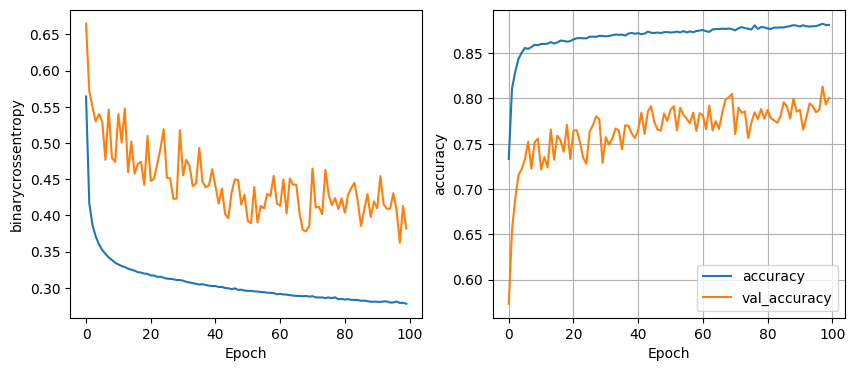

119/119 [==============================] - 1s 5ms/step - loss: 0.3161 - accuracy: 0.8699
0.8698738217353821
num_nodes:32 drop_prob:0.2 lr:0.01 batch_size:32 epoch:100


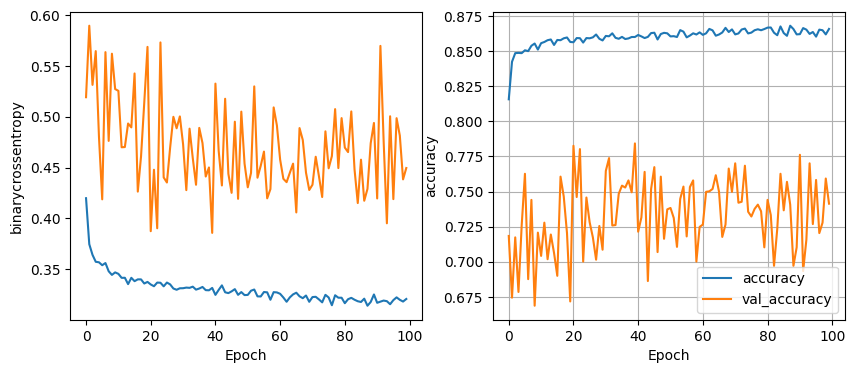

119/119 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8691
0.8690851926803589
num_nodes:32 drop_prob:0.2 lr:0.01 batch_size:64 epoch:100


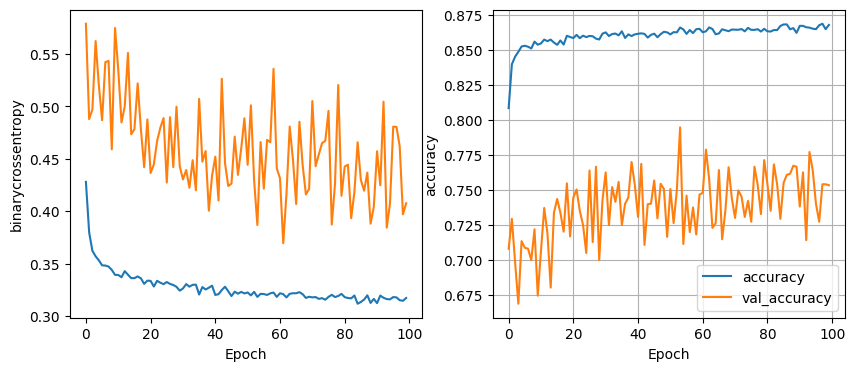

119/119 [==============================] - 1s 4ms/step - loss: 0.3189 - accuracy: 0.8725
0.8725026249885559
num_nodes:32 drop_prob:0.2 lr:0.01 batch_size:128 epoch:100


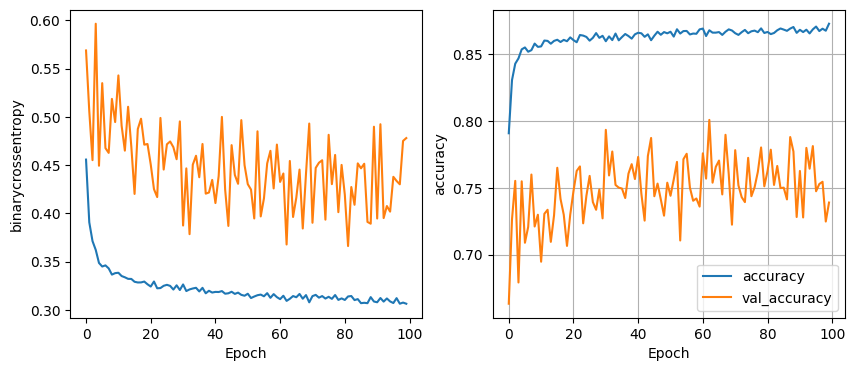

119/119 [==============================] - 1s 7ms/step - loss: 0.3137 - accuracy: 0.8712
0.871188223361969
num_nodes:32 drop_prob:0.2 lr:0.005 batch_size:32 epoch:100


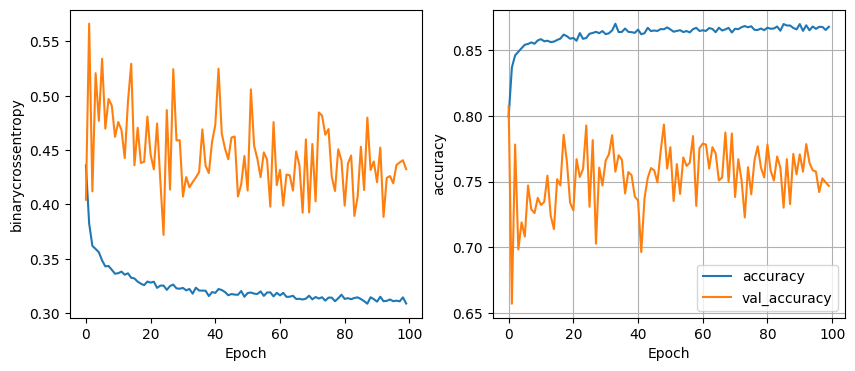

119/119 [==============================] - 1s 4ms/step - loss: 0.3122 - accuracy: 0.8715
0.8714510798454285
num_nodes:32 drop_prob:0.2 lr:0.005 batch_size:64 epoch:100


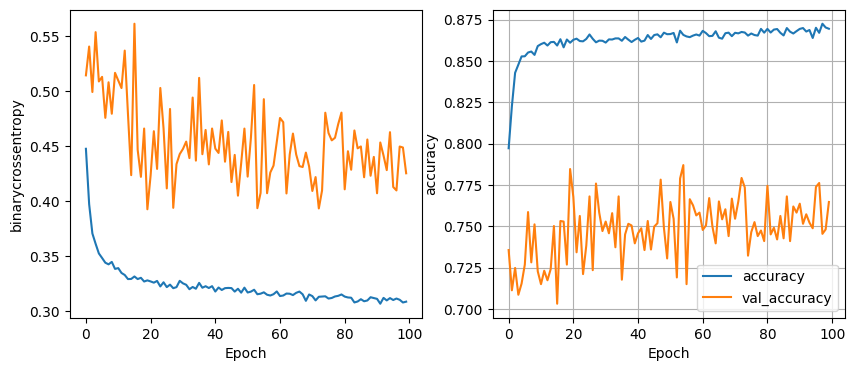

119/119 [==============================] - 1s 6ms/step - loss: 0.3116 - accuracy: 0.8725
0.8725026249885559
num_nodes:32 drop_prob:0.2 lr:0.005 batch_size:128 epoch:100


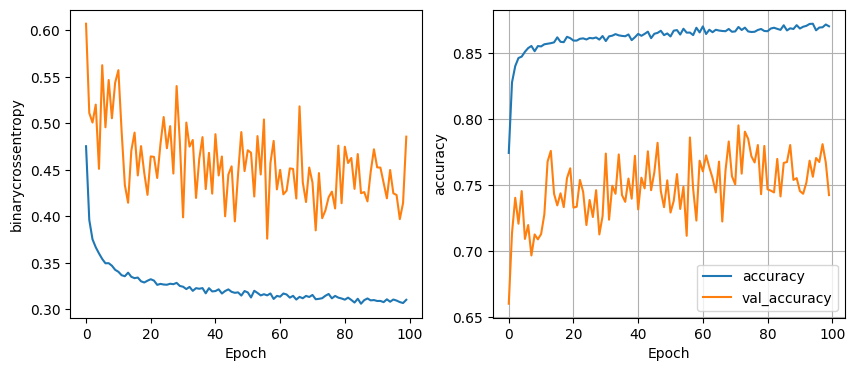

119/119 [==============================] - 1s 5ms/step - loss: 0.3205 - accuracy: 0.8667
0.8667192459106445
num_nodes:32 drop_prob:0.2 lr:0.001 batch_size:32 epoch:100


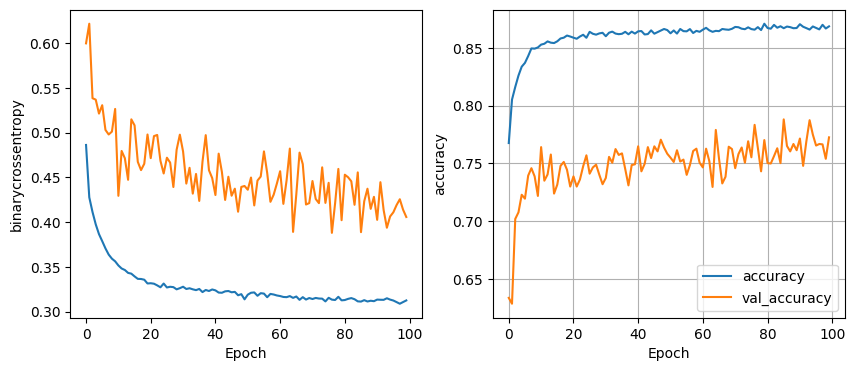

119/119 [==============================] - 1s 6ms/step - loss: 0.3077 - accuracy: 0.8720
0.8719768524169922
num_nodes:32 drop_prob:0.2 lr:0.001 batch_size:64 epoch:100


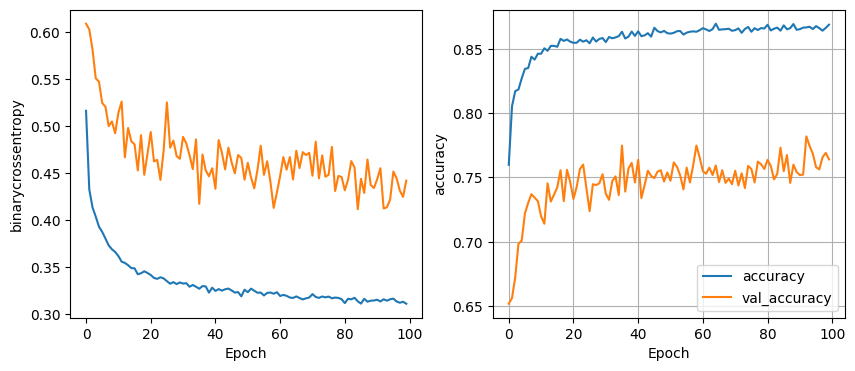

119/119 [==============================] - 1s 8ms/step - loss: 0.3120 - accuracy: 0.8701
0.8701366782188416
num_nodes:32 drop_prob:0.2 lr:0.001 batch_size:128 epoch:100


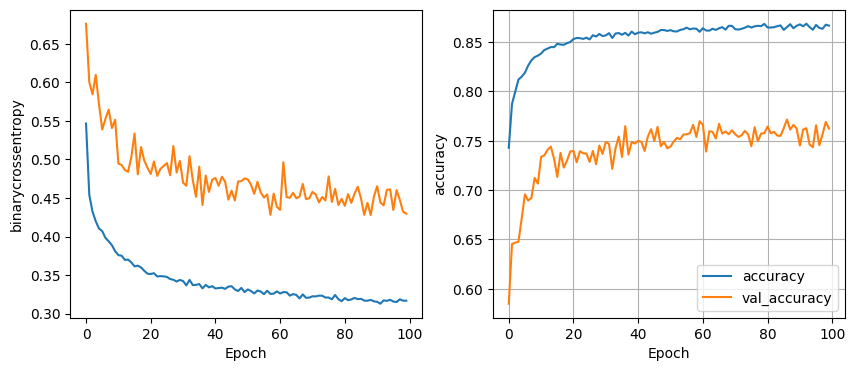

119/119 [==============================] - 1s 7ms/step - loss: 0.3093 - accuracy: 0.8754
0.875394344329834
num_nodes:64 drop_prob:0 lr:0.01 batch_size:32 epoch:100


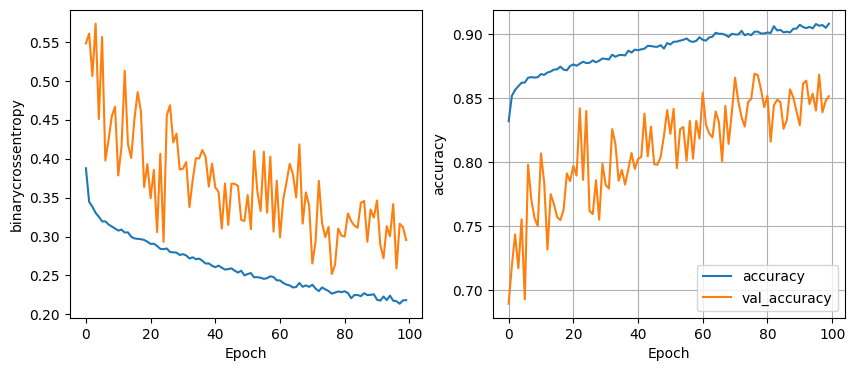

119/119 [==============================] - 1s 6ms/step - loss: 0.4183 - accuracy: 0.8644
0.8643532991409302
num_nodes:64 drop_prob:0 lr:0.01 batch_size:64 epoch:100


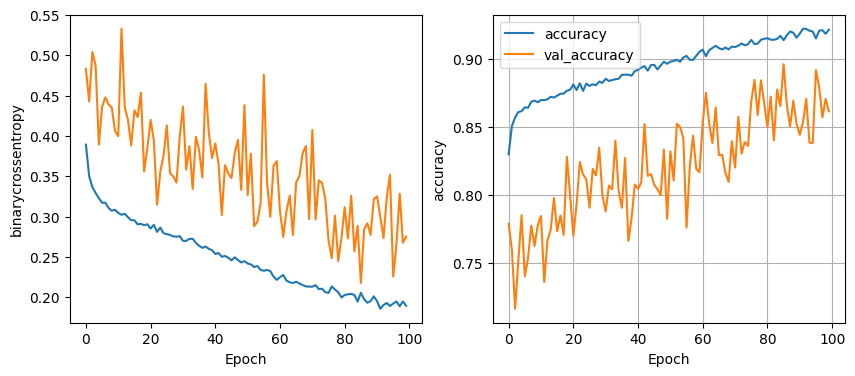

119/119 [==============================] - 1s 7ms/step - loss: 0.4467 - accuracy: 0.8646
0.8646162152290344
num_nodes:64 drop_prob:0 lr:0.01 batch_size:128 epoch:100


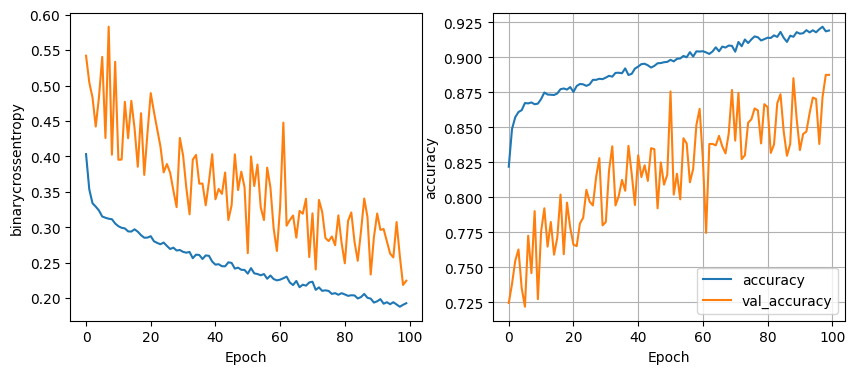

119/119 [==============================] - 1s 6ms/step - loss: 0.4563 - accuracy: 0.8580
0.8580441474914551
num_nodes:64 drop_prob:0 lr:0.005 batch_size:32 epoch:100


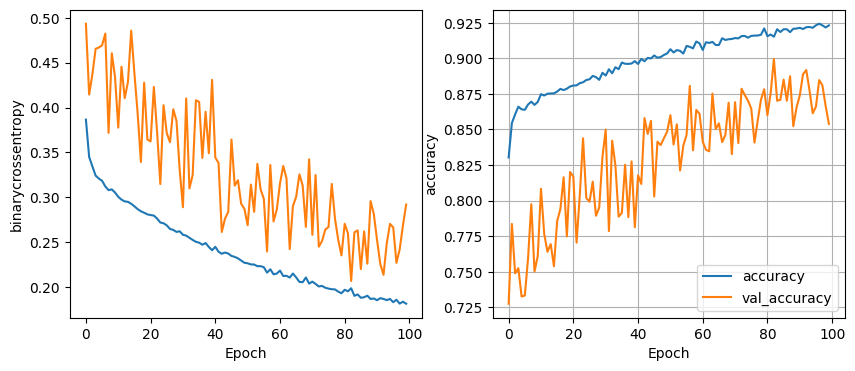

119/119 [==============================] - 1s 8ms/step - loss: 0.4777 - accuracy: 0.8552
0.8551524877548218
num_nodes:64 drop_prob:0 lr:0.005 batch_size:64 epoch:100


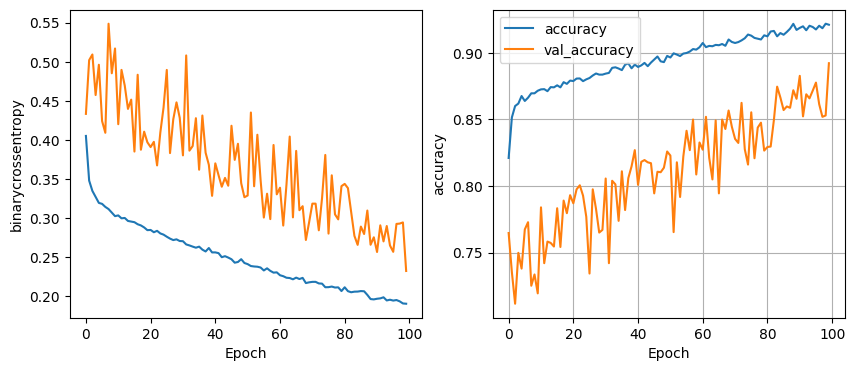

119/119 [==============================] - 1s 9ms/step - loss: 0.4479 - accuracy: 0.8583
0.8583070635795593
num_nodes:64 drop_prob:0 lr:0.005 batch_size:128 epoch:100


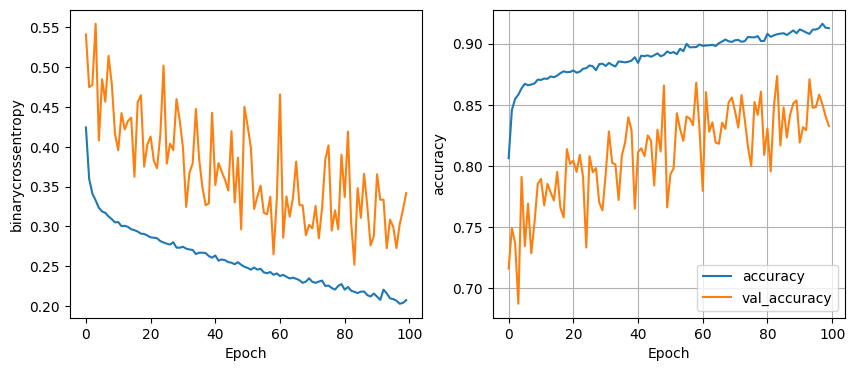

119/119 [==============================] - 1s 8ms/step - loss: 0.3983 - accuracy: 0.8659
0.8659306168556213
num_nodes:64 drop_prob:0 lr:0.001 batch_size:32 epoch:100


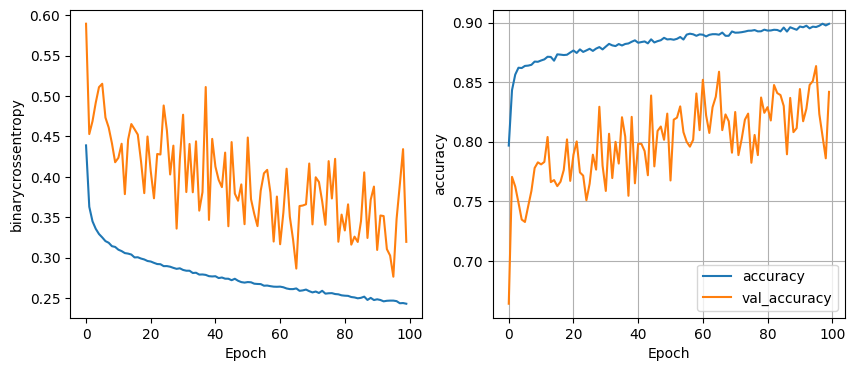

119/119 [==============================] - 1s 8ms/step - loss: 0.3354 - accuracy: 0.8688
0.8688222765922546
num_nodes:64 drop_prob:0 lr:0.001 batch_size:64 epoch:100


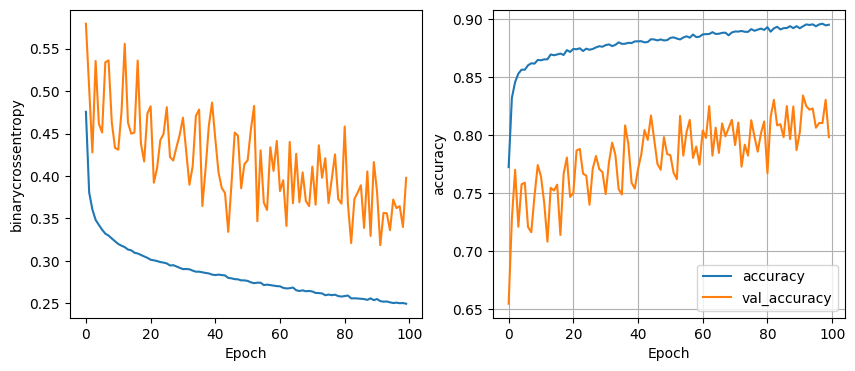

119/119 [==============================] - 1s 7ms/step - loss: 0.3370 - accuracy: 0.8665
0.8664563894271851
num_nodes:64 drop_prob:0 lr:0.001 batch_size:128 epoch:100


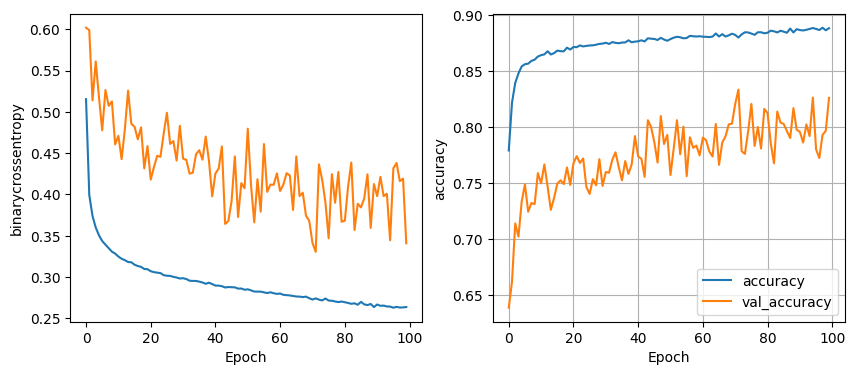

119/119 [==============================] - 1s 10ms/step - loss: 0.3197 - accuracy: 0.8665
0.8664563894271851
num_nodes:64 drop_prob:0.2 lr:0.01 batch_size:32 epoch:100


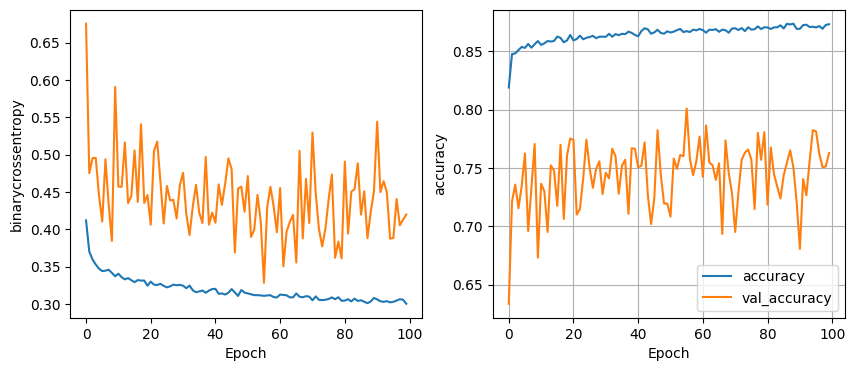

119/119 [==============================] - 1s 8ms/step - loss: 0.3218 - accuracy: 0.8707
0.8706624507904053
num_nodes:64 drop_prob:0.2 lr:0.01 batch_size:64 epoch:100


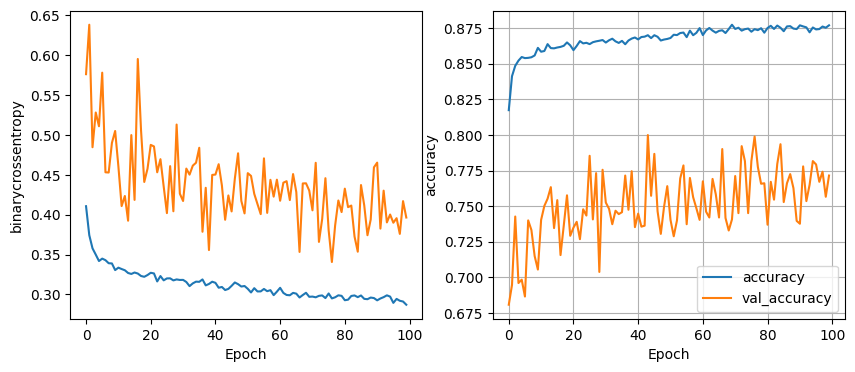

119/119 [==============================] - 1s 8ms/step - loss: 0.3188 - accuracy: 0.8696
0.8696109652519226
num_nodes:64 drop_prob:0.2 lr:0.01 batch_size:128 epoch:100


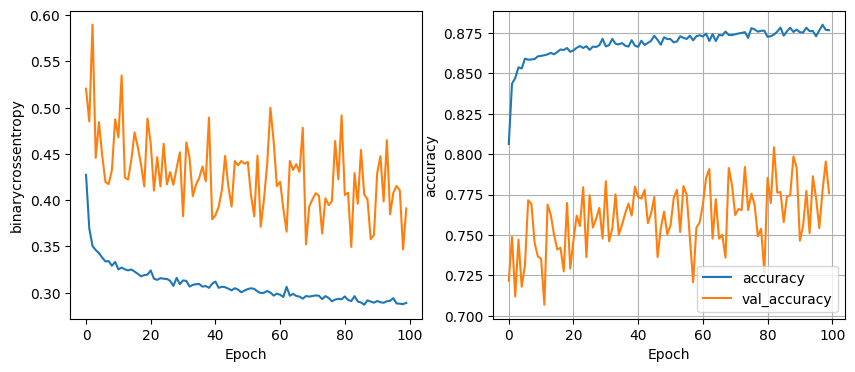

119/119 [==============================] - 1s 8ms/step - loss: 0.3147 - accuracy: 0.8746
0.874605655670166
num_nodes:64 drop_prob:0.2 lr:0.005 batch_size:32 epoch:100


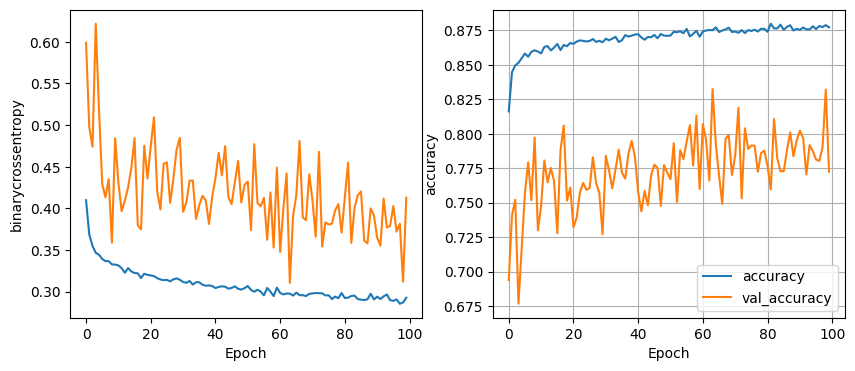

119/119 [==============================] - 1s 6ms/step - loss: 0.3171 - accuracy: 0.8686
0.8685594201087952
num_nodes:64 drop_prob:0.2 lr:0.005 batch_size:64 epoch:100


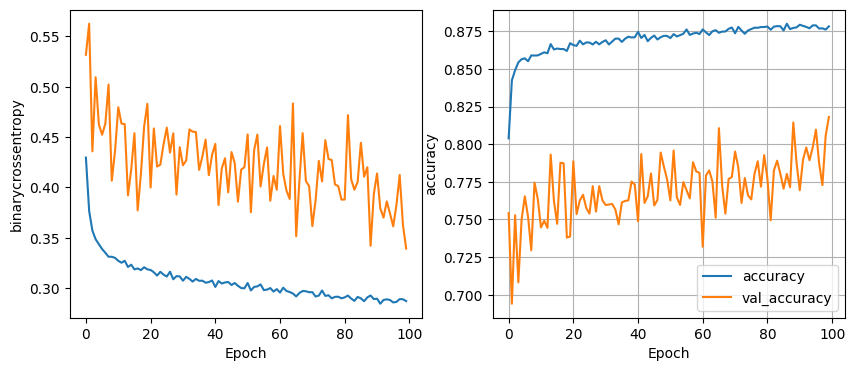

119/119 [==============================] - 1s 7ms/step - loss: 0.3114 - accuracy: 0.8712
0.871188223361969
num_nodes:64 drop_prob:0.2 lr:0.005 batch_size:128 epoch:100


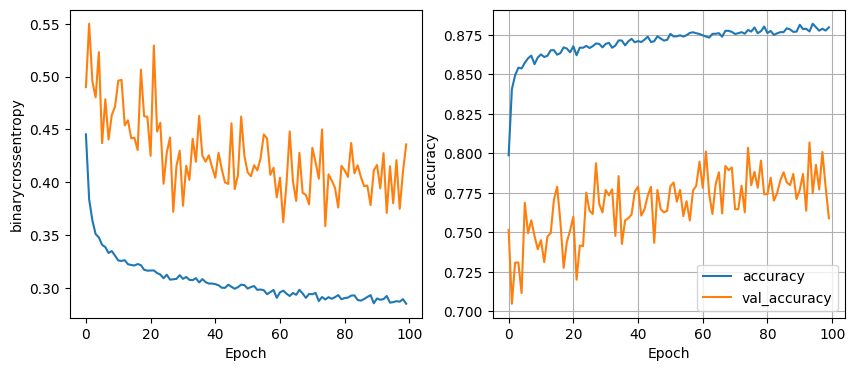

119/119 [==============================] - 1s 8ms/step - loss: 0.3232 - accuracy: 0.8678
0.867770791053772
num_nodes:64 drop_prob:0.2 lr:0.001 batch_size:32 epoch:100


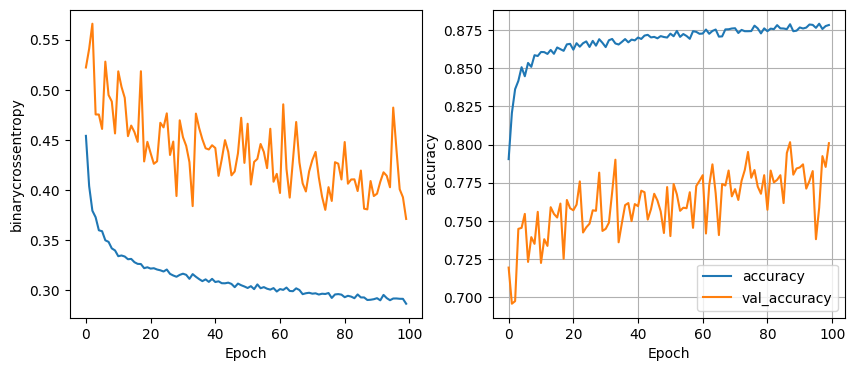

119/119 [==============================] - 1s 8ms/step - loss: 0.3054 - accuracy: 0.8770
0.8769716024398804
num_nodes:64 drop_prob:0.2 lr:0.001 batch_size:64 epoch:100


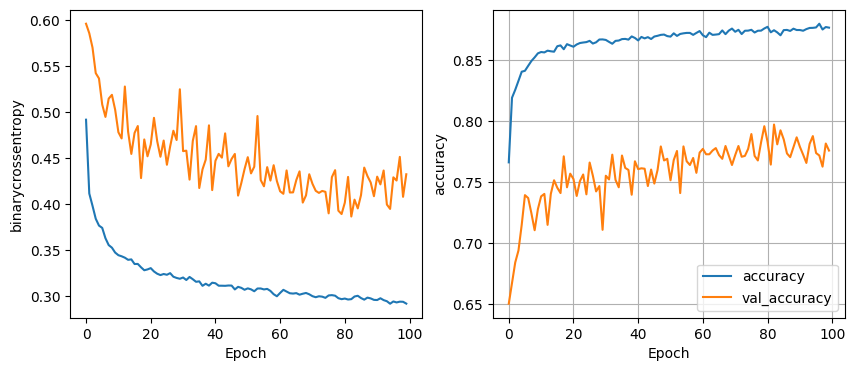

119/119 [==============================] - 1s 9ms/step - loss: 0.3080 - accuracy: 0.8701
0.8701366782188416
num_nodes:64 drop_prob:0.2 lr:0.001 batch_size:128 epoch:100


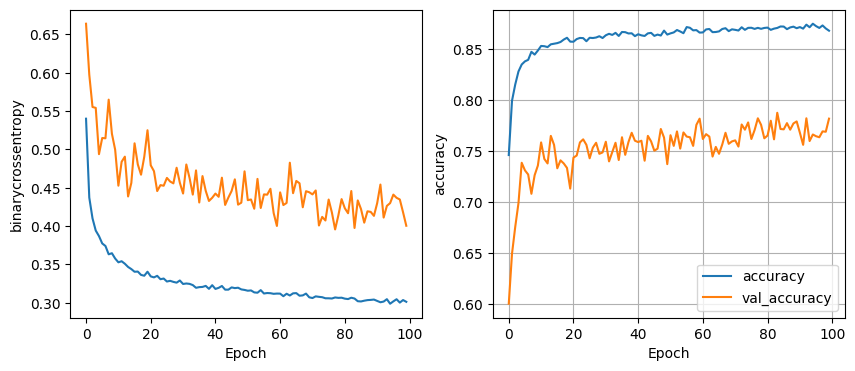

119/119 [==============================] - 1s 10ms/step - loss: 0.3033 - accuracy: 0.8778
0.8777602314949036


In [38]:
least_val_loss = float("inf")
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for drop_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"num_nodes:{num_nodes} drop_prob:{drop_prob} lr:{lr} batch_size:{batch_size} epoch:{epochs}")
                model, history = train_model(X_train, y_train, num_nodes, drop_prob, lr, batch_size, epochs)
                plot_history(history)

                val_loss = model.evaluate(x_validation, y_validation)[1]
                print(val_loss)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model



In [41]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

119/119 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1313
           1       0.87      0.92      0.90      2491

    accuracy                           0.86      3804
   macro avg       0.86      0.83      0.84      3804
weighted avg       0.86      0.86      0.86      3804

